# Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# LET'S IMPORT OUR DATASET CENSUS INCOME

In [2]:
census_income=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
census_income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
census_income.shape

(32560, 15)

AS WE CAN SEE THERE ARD ALMOST 32000 ROWS AND 15 COLUMN WHICH IS KIND OF BIG DATASET AND OUR TARGET VARIABLE IS INCOME AND LOOKING IT WE CAN SAY THAT IT SI CLASSIFICATION PROBLEM

In [4]:
census_income.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
census_income["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

AS WE CAN SEEE THAT THERE ARE ALMOST 24719 PEOPLE WHO ARE UNDER 50k OR EQUAL INCOME RANGE A YEAR 

AND THERE ARE ALMOST 7841 PEOPLE WHO IS HAVING INCOME MORE THAN 50K A YEAR

In [6]:
census_income["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

AS WE CAN SEE THAT THERE ARE MORE NUMBER OF PEOPLE WHO ARE MARRIED AS COMPARED TO WHO ARE NOT MARRIED , DIVORECED , SEPARTED , WIDOWED , MARRIED SPUSE ABSENT , AND VERY LESS NUMBER OF PEOPLE ALMOST 23 WHOA HAVE MILITARY SPOUSE 

In [7]:
# LET'S CHECK NULL VALUES PRESENT IN THE DATASET
census_income.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

AS WE CAN CLEALRY SEE THAT THERE IS NO NULL VALUES PRESEN IN THE DATASET

In [8]:
# NOW LET'S CHECK FROM HOW MANY RACE POPEL ARE PRESENT 
census_income["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

AS WE CAN SEE THAT IN U.S.A THERE VAST MAJORITY OF RACIAL DIVERSITY AS WE CAN SEE THAT VAST NUMBER OF PELOPLE COMES FROM WHITE RACE MAYBE PARTS FROM EUROPE , NOTH AFRICA ETC.
BUT ALSO THERE ARE MANY NUMBER OF BLACK PEOPLE IN THE U.S.A SOME OF NATIVE AMERICAN AND AND SOME MAUBE PARTS OF AFRICA PR CARRIBAN ISLANDS 

AND LEAST NUMBER OF PEOPEL FROM ASIA PACIFIC OR PACIFIC ISLAND AND AMERIACN AND INDIAN TRIBE ESKIMO ARE FROM ARCTIC POEPLE 

BUT AS WE CAN SEE THERE ARE VAST MAJORITY OF WHITE PEOPLE IN THE INCOME POPULATION 

In [9]:
# NOW LET'S CHECK FROM HOW MANY EDUCATED  POPEL ARE PRESENT 
census_income["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

AS WE CAN SEE MANY PEPOPLE FROM THIS DATSET HAVE HIGHER SECONADRY GRADUATED POEPLE AFTER THAT SOME - COLEGE DEGREE MEAN STHEY ENROLL IN THE COLLEGE BUT NOT COMPLETED THE EDUACTION 

ADB AFTR THAT BACHELORS AND MASTERS DEGREE PEOPLE AND ASSO-VOC MEAN PEOPLE WHO AHVE DID EDU=CATION FROM ASSOCIATE COCCATOPNAL FROM APPLIED SCIENCE FOR PRACTICAL SKILL OR KNOWLEDGE 

In [10]:
census_income["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

AS WE CAN SEE MAXIMUM NUJMNER OF PEOPELE ALMAOT 22696 OING OTHER PRIVATE CLASS JOB AND MNAY OF THEM ARE MAYBE SELF EMPLOYED UT NOT EARNING INCOME AND AFTER THAT  PEOPLE ARE LOCAL GOVERMENT 

BUT FROM THIS DATSET WE CAN SEE THAT U.S.A POPULATION MANY FOCUS OR HIT PRIVATE JOB AS COMPARED TO GOVERMENT JOBS BECAUSE GOVERMNET JOB  ARE LESS AND PRIVATE JOBS ARE HIGH DUE TO WHICH MOST ARE SEEMS TON BE PRIVATE JOB AN DMANY ARE UNEMPLOYED OR NOT EARNING 

AND FEW OF THEM ARE REPSENTS BY "?" MARKS MAYBE THER DATA IS UNKNOWN

In [11]:
census_income["Workclass"]=census_income["Workclass"].str.strip().replace("?","others")

In [12]:
census_income.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [13]:
census_income["Workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
others               1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

AS WE CAN SEE THAT WE HAVE REMOVED THE "?" WIHT "OTHERS " IN OUR DATSET NOW OUR XATASET IS MORE CLEALR TO VISULAIZE AND READ 

In [14]:
census_income.duplicated().sum()

24

AS WE CAN SEE THAT THERE ARE 24 DUPLICATED ROWS IN OUR DATASET 

In [15]:
census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
census_income["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

AS WE CAN SEE THAT THERE ARE FEW PLACE IN THE WORLD FROM WHERE POEPLE BELONGS ARE REPRESENT BY "? " SO WE HAVE TO REPLACE IT WITH OTHERS 

BUT ONE MORE THING YOU CAN SEE AS WELL THAT MOST POEPLE ARE FROM U.S.A ALMOST 29169 AFTER THAT MANY PEOPLE ARE FROM MEXICO DUE IT SHARE LAND WITH MEXICO AND AFTER THAT MANY PEOPLE FROM " OTHER "
AND AFTER THAT POEPLE ARE FROM " PHILLIPINES ", AFTER THAT "GERMANY, "CANADAA "


In [17]:
census_income["Native_country"]=census_income["Native_country"].str.strip().replace("?","others")

In [18]:
census_income["Native_country"].value_counts()

United-States                 29169
Mexico                          643
others                          583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

AS WE CAN SEE WE HAVE REMOVED THE "? " WITH "OTHERS" COLUMN NOW OUR DATSET IS CLEANED 

In [19]:
census_income["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

AS WE CAN CLEALRY SEE THAT THERE ARE 21789 NUMBER OF MALES WHO ARE EARNING IN U.S.A COMAPRE TO WOMENS WHICH ARE AKMOST 10771 

In [20]:
census_income["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

AS WE CAN CLEARY SEE THAT MOST NUMBER OF POEPLE 
ALMOST 4140 PEOPLE INVOLVE IN PROFESSIONAL TYPE OF ACTIVITY LIKE ENGINERRING , DOCTORATE , AND OTHER PROFESSIONAL ACTIVITY 

SECOND ALMOST 4099 PEOPLE WOKING AS CRAFT REPAIR LIKE REOARING SOME BUKEN, CARS WHICH REQUIRE HAND ON ROLES  AFTER THAT 
MANYPOEPLE ALSO WOKRING AS A EXECUTIVE POR ON MANAGERIAL POSITION 4066 
AFTER THAT MANY POPLE ALSO WORKING OJN ADMINISTRATIVE ASSISTNTS , SECREATRIES AND OFFICE MANAGERS 

AND VERY FEW POEPLE ARE WORKING AS LIFE SAVING JOB LIKE ARMED FORCE , FIREFIGHTER PROTECTIVE KIND OF SERVICE AND HOUSEHOLD SERVICES

In [21]:
census_income["Occupation"]=census_income["Occupation"].str.strip().replace("?","others_occup")

In [22]:
census_income["Occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
others_occup         1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [23]:
# NOW LET'S CHECK THE RELATIONSHIP BETWEEN THE FEATURES 
relat1=pd.crosstab(census_income["Occupation"],[census_income["Income"],census_income["Race"]])

In [24]:
relat1

Income                          <=50K                                    \
Race               Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other   
Occupation                                                                
Adm-clerical                       28                 117    448     25   
Armed-Forces                        1                   0      1      0   
Craft-repair                       38                  64    195     23   
Exec-managerial                    27                  74    160      9   
Farming-fishing                    10                  14     42     11   
Handlers-cleaners                  22                  22    168     12   
Machine-op-inspct                  19                  49    252     38   
Other-service                      31                 111    554     40   
Priv-house-serv                     0                   4     28      3   
Prof-specialty                     22                  95    173     22   
Protective-serv                     6                  10     77      4   
Sales                              22                  87    223     22   
Tech-support                        4                  32     58      3   
Transport-moving                   22                  24    152     13   
others_occup                       23                  60    206     21   

Income                                  >50K                             \
Race               White  Amer-Indian-Eskimo  Asian-Pac-Islander  Black   
Occupation                                                                
Adm-clerical        2644                   3                  22     42   
Armed-Forces           6                   0                   0      0   
Craft-repair        2850                   6                  25     49   
Exec-managerial     1828                   3                  61     84   
Farming-fishing      802                   0                   2      0   
Handlers-cleaners   1060                   0                   1     11   
Machine-op-inspct   1394                   0                  10     22   
Other-service       2422                   2                  17     17   
Priv-house-serv      113                   0                   0      0   
Prof-specialty      1969                  11                  91     66   
Protective-serv      341                   2                   5     25   
Sales               2313                   4                  21     31   
Tech-support         548                   0                  12     13   
Transport-moving    1066                   3                   4     18   
others_occup        1342                   2                   5      9   

Income                           
Race               Other  White  
Occupation                       
Adm-clerical           1    439  
Armed-Forces           0      1  
Craft-repair           5    844  
Exec-managerial        2   1818  
Farming-fishing        0    113  
Handlers-cleaners      0     74  
Machine-op-inspct      1    217  
Other-service          0    101  
Priv-house-serv        0      1  
Prof-specialty         9   1682  
Protective-serv        1    178  
Sales                  3    924  
Tech-support           0    258  
Transport-moving       1    294  
others_occup           2    173

AS WE CAN CLAELEY SEE THAT WHITE POEPLE ARE MORE COMAPRED TO OTHER RACE SO THE LESS INCOME FOR ALL OCCPUATIION ALSO EARNED LESS FOR WHITE POPLE AND MORE INCOME ALSO EARNED MORE WHITE PEPOLE BEACUSE WHITE RACE PEOPLE ARE MOE COMAPRED TO ANY OTHER RACE 

In [25]:
relat2=pd.crosstab(census_income["Income"],census_income["Sex"])
relat2                                       

Sex,Female,Male
Income,,
<=50K,9592,15127
>50K,1179,6662


1. AS WE CAN CLEALY SEE THAT POEPLE WHO ARE EARNING LESS THAN 50K ARE GENARLLY MORE FEMAL AS COMPARED TO MALES 
2. WE CAN ALSO EVEN POEPLE WHO ARE EARNING MORE THAN 50K IN YEAR GENRALLY IN THAT ALSO THERE ARE MORE NUMBER OF MALES AS COMAPRED TO FEMALE 

In [26]:
census_income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
census_income["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [28]:
relat3=pd.crosstab(census_income["Native_country"],census_income["Income"])
relat3 

Income,<=50K,>50K
Native_country,,
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9
England,60,30


AS WE CAN SEE FROM THE TABLE THAT AFTER U.S.A , MEXICO IS THE COUNTRY WHERE PEOPLE IS EARNING LESS THAN 50K(ALMOST 602)AFTER THAT PHILIPINA PEOPLE (AMOST 137) AND AFTER THAT PUERTO RICO(ALMSOIT 102) 

AND THE PEOPLE FROM UNITED STATES WHICH RE EARNING MORE THAN 50K ARE HIGHESTV(ALMSOT 7171) AND AFTER THAT PHILLPINES PEOPLE ARE EARING (ALMOST 61) AND AFTER THAT GERMANY AMOST(44) ADN AFTER THAT INDIA (AQLMOST 40)

In [29]:
relat4=pd.crosstab(census_income["Education"],[census_income["Income"],census_income["Workclass"]])
relat4 

Income              <=50K                                              \
Workclass     Federal-gov Local-gov Never-worked Private Self-emp-inc   
Education                                                               
 10th                   6        30            2     648           16   
 11th                   8        34            1     878           10   
 12th                   5        17            0     310            6   
 1st-4th                0         4            0     131            2   
 5th-6th                1         8            0     259            2   
 7th-8th                2        27            1     406            9   
 9th                    2        20            0     369           10   
 Assoc-acdm            36        60            0     559           17   
 Assoc-voc             23        61            0     749           19   
 Bachelors            117       315            0    2056          102   
 Doctorate              1        10            0      49            6   
 HS-grad              190       413            1    6661          160   
 Masters               20       169            0     360           22   
 Preschool              0         4            0      41            0   
 Prof-school            6        10            0      86            3   
 Some-college         172       294            2    4171          110   

Income                                                             >50K  \
Workclass     Self-emp-not-inc State-gov Without-pay others Federal-gov   
Education                                                                 
 10th                       60        11           0     98           0   
 11th                       53        13           0    118           1   
 12th                       16         8           0     38           0   
 1st-4th                    12         1           0     12           0   
 5th-6th                    15         4           0     28           0   
 7th-8th                    80        10           1     70           0   
 9th                        30         6           0     50           1   
 Assoc-acdm                 53        35           1     41          19   
 Assoc-voc                  87        34           0     48          15   
 Bachelors                 236       179           0    128          95   
 Doctorate                  19        18           0      4          15   
 HS-grad                   687       219           9    486          73   
 Masters                    65        98           0     30          47   
 Preschool                   0         1           0      5           0   
 Prof-school                25        13           0     10          23   
 Some-college              379       294           3    479          82   

Income                                                                          
Workclass     Local-gov Private Self-emp-inc Self-emp-not-inc State-gov others  
Education                                                                       
 10th                 1      47            3                7         2      2  
 11th                 2      45            4                7         1      0  
 12th                 2      23            1                3         2      2  
 1st-4th              0       5            0                1         0      0  
 5th-6th              1       7            2                4         0      2  
 7th-8th              1      18            5               14         0      2  
 9th                  3      18            0                4         0      1  
 Assoc-acdm          28     170           18               18         6      6  
 Assoc-voc           25     256           19               21        12     13  
 Bachelors          162    1495          171              163        90     45  
 Doctorate           17     132           29               31        71     11  
 HS-grad             90    1119          119        

AS WE CAN SEE THAT INCOME FOR DIFFERENT WORK CLASS AND EDUCATION PEOPLE IN WHICH OBVIOSULY PRIVATE WORKCLASS AND HS -GRAD EDUCATION PEOPLE ARE HIGHEST IN NUMBER COMPARED TO ANY OTHER AREA 

AFTER THAT IN PRIVATE SECTOR SOME COLLEGE  ARE EARNING LESS THAN 50K ARE MORE COMPARED TO OTHER AND SAME IN MORE THAN 50K SOME COLLEGE EDUCATION IN PRIVATE CLASS ARE HIGHER AFTER HS- GRAD PEOPLE

WE CAN ASLO SEE THAT AFTER PRIVATE CLASS SELF EMP-NO ICOME  PEOPLE ARE ALSO HIGHER IN LESS THAN 50K ANDIN ALL EDUCATION SYSTEM 

SAME AS IN FEDERAL GOVERMRNT ALSO SOME COLLEGE GRADUATE PEOPEL ARE ALSO HIGER IN FEDERAL GOVERMENT AFTER HS-GRAD AMD SAM IJN PRIVATE CLASSS 

In [30]:
relat5=pd.crosstab(census_income["Workclass"],census_income["Race"])
relat5 

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Workclass,,,,,
Federal-gov,19,44,169,7,721
Local-gov,36,39,288,10,1720
Never-worked,0,0,2,0,5
Private,190,713,2176,213,19404
Self-emp-inc,2,46,23,5,1040
Self-emp-not-inc,24,73,93,9,2342
State-gov,15,58,159,4,1061
Without-pay,0,1,1,0,12
others,25,65,213,23,1510


AS WE CAN CLEALRY SEEE THAT AFTER WHITE IN PRIVATE , BLACKS PEOPLE ARE MORE IN PRIVATE CLASS AND AFTER THAT ASIAN -PACIFIC ISLADER AFTER THAT OTHER CATEGORY 

AND SA,ME TRREND WE SEE IN THE FEDERAL GOVERMENT WORK CLASS WHERE WHITE PEPOPLE ARE MORE AND THEN BLACK AND THEN ASIAN -PACIFIC ISLANDER 

UT IN ALL THAT WE SEE SOME DIFFERNT TREND IN SELF-EMP INC CLASS AS WHITE ARE HIGHEST BUT AFTER THAT BLACK ARE LESS COMAPRED OT ASIAN-PACIFIC_ISLANDERS 

In [31]:
relat6=pd.crosstab(census_income["Occupation"],census_income["Race"])
relat6

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Occupation,,,,,
Adm-clerical,31,139,490,26,3083
Armed-Forces,1,0,1,0,7
Craft-repair,44,89,244,28,3694
Exec-managerial,30,135,244,11,3646
Farming-fishing,10,16,42,11,915
Handlers-cleaners,22,23,179,12,1134
Machine-op-inspct,19,59,274,39,1611
Other-service,33,128,571,40,2523
Priv-house-serv,0,4,28,3,114


AS WE CAN SEE SIMILAR TREDN THAT IN ANY SECTOR WHITE POEPLE ARE HIGHEST COMPARED TO OTHERS AFTER THAT  BLACK AND THEN SASIA -PACIFIC ISLANDERS 
BUT IN THE BLACK COMMUNITY PEOPLE OTHERS SERVICE PEOPLE ARE HIGHEST IN THERE OWN COMMUNITY COMPARED TO OTHER SECTOR 

SIMILALRY IN THE ASIAN -PACIFIC -ISALNDERS MORE POEPLE ARE IN PROFESSIONAL SPEACIALIST LIKE ENGINEERS , DOCTOR , OR ANY KIND OF SPACIALIZATION IT MEAN THIS RACE PEOPLE ARE GENERALLY MORE FOCUSED TO GO TO THESE FIELDS AS COMPARED TO OTHER RACE POEPLE 

AS BLACK MORE OBESSED WITH OTHER SERVICES AND WHITE ARE OBESSED WITH GOING TO CRAFT-REPAIR OCCUPATION AND AFTER THAT EXECUTIVE OR MANGERIAL POSITION AFTE RTHAT PROFESSIONAL -SPEACILITY

In [32]:
relat7=pd.crosstab(census_income["Native_country"],census_income["Occupation"])
relat7

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,others_occup
Native_country,,,,,,,,,,,,,,,
Cambodia,0,0,6,1,1,0,4,1,0,3,0,2,0,0,1
Canada,12,0,15,13,2,2,5,12,0,24,2,9,3,8,14
China,2,0,3,10,0,0,8,16,0,22,0,5,2,0,7
Columbia,8,0,9,4,0,3,10,8,1,5,0,3,3,2,3
Cuba,12,0,7,16,2,3,6,13,2,11,2,10,0,8,3
Dominican-Republic,4,0,6,2,0,5,22,12,1,3,1,8,0,3,3
Ecuador,1,0,4,1,0,1,8,3,1,2,0,3,1,2,1
El-Salvador,4,0,15,2,2,7,6,40,6,7,0,7,0,4,6
England,7,0,8,20,1,2,3,7,3,21,3,7,4,0,4


AS WE CAN SEE PREVIOSUL THAT MEXICO PEOPLE ARE THE HIGHEST AFTER U.S.A UT IN THE OCCUOATION MEXICAN MORE IN OTHER SRIVCES , AND AFTER THAT CRFT REPAIR 

AND AFTER THAT PHILIPHINES PEOPLE ARE HIGHER IN OTHER TYPE OF SERVICES (ALMSOT 36) AND AFTER THAT ADMINISTRATIVE POSITION LIKE SECRETRIES AND AFTER THAT PROFESSIONAL SPECIALIST PEOPLE 

BUT IN ALL OF THESE THE JOBS WHICH ARE CONSIDER AS HIGH CLASS IN THE THING :
1. WE CAN SEE PEOPLE FROM INDIAN ORIGIN HAVE HIHGEST NUMBER OF PROFESSIONAL -SPEACIALIST AFTER WHITE COMAPRED TO ANY OTHER ORIGIN POEPLE (IT MEANS OTHER THAN U.S.A INDIANN PEOPLE AHVE DOMINATED THE U.S.A ) IN TERMS OF PROFESSIONAL SPECIALIST AND AFTER THAT ADMINSTRTIVE ALSO INDIAN POEPLE NUMBERS ARE HIGHER 

2. AS WE ALSO SEE THAT IN EXCEXUTIVE MANAGERIAL TYPE ROLE POEPLE FROM ENGLAND HAVE HIGHEST NUMBER OF POPELE AFTER U.S.A PEOPLE AND AFTER THAT GERMANY , JAPAN AND AFTER THAT CUBA INTRESETING TO SEE CUBA IN THE LIST 

3. IN TRANSPORT MOVING WE CAN CLEALRY SEE THAT AFTER AMERICAN , MEXICAN POEPLE HAVE HIGHEST NUMBER OF TRANSPORT MOVING BUSINES RATHER THAN ANYT OTHER COUNTRY PEOPLE 

4. IN ADMINIDSTARTIVE POSITION WE CAN SEE CLEALRY THAT PHILLIPINES ADN MEXICO PEOPLE AHVE DOMINATED WITH SAME (36 ) AND AFTER THAT GERMAN PEOPLE AND THEN AFTER THAT JAMICAN AND PUERTO RICO PEOPLE 

5. VERY INTERESTING TO SEE THAT IN LOW CLASS TYPE OF JOB IN SCOIERTY DESRIBED HUMAN IN THAT ALSO MEXICAN POEPLPE ARE HIGHER WITH THA HEAVY MARGIN (70) IN HANDS CLEANERS SWEEPER MEXICAN ARE HIGHEST AND AFTER THAT FROM SOUTH AMERICAN COUNTRY LIKE GUATAMELA , ECUADAOR , EL-SALVADOR AND PHILLIPINES 

6.IN PRIVATE HOUSE SERRIVES ALSO MEXICAN ARE HIGHEST AND AFTER TAHT GUATAMELA PEOPLE ADN AFTER TAHT EL-SALAVADOR POEPLE 

7. IN THE TECH SUPPORT PHILLIPINES ARE HIGEHST AFTER THE U.S.A POEPLE 

8. IN THE SALES MEXICO , PHILLIPINES , SOUTH ARE MORE COMAPRED TO OTHER 

9. INTERESTINGLKY WE CAN SEE MACHINE- OPERATION SPEACIALIST MISTLY CARRIBEAN ISALND COU TRY PEOPLE ARE HIGHEST LIKE DIMINICAN REPUBLIC , PUERTO RICO , AND HIGHEST IS MEXICAN ADFTER THAT PHILLIPINES PEOPLE 

FOM THIS WE  ALSO CONCLUDE THAT PHILLIPINES AND MEXICAN POEPLE ARE MORE DIVERSIFIED IN EVERY FIELD OR JOB TYPE ROLE IN U.S.A 

In [33]:
relat8=pd.crosstab(census_income["Marital_status"],census_income["Income"])
relat8

Income,<=50K,>50K
Marital_status,,
Divorced,3980,463
Married-AF-spouse,13,10
Married-civ-spouse,8284,6692
Married-spouse-absent,384,34
Never-married,10191,491
Separated,959,66
Widowed,908,85


AS WE CAN SEE VERY GOOD INFOEMATION :-
1. WE CAN CLEALRY SEE THAT PEOPLE AWHOA RE EARNING LESSS THAN 50K IN U.S.A ARE GENERALLY NEVER MARRIED (10191) AFTER THAT COUPLE WHOES SPUSE ARE CIVILIAN THAT POEPL ARE LASO MORE HAVING INCOME LESS THAN 50K AFTER THAT DIVORCED PEOPLE (3980) ARE EARNING LESS THAN 50K 

2. AND POEPLE WHO ARE EARNING MORE THAN 50K ARE GENRALLY MARRIED PEOPLE WITH SPOUSE FROM CIVILIAN BACKGROUND  AFTER THAT NEVER MARRIED POEPLE AND AFTER THAT DIVORCED PEOPLE 

BUT WE CAN ASLO SEE THAT THERE AMNY NUMBER OF DIVORCED POEPLE IN THE U.S.A AND VERY LESS NUMBER POEPLE PURSUE ARMEDN FORCES 

In [34]:
relat8=pd.crosstab(census_income["Native_country"],census_income["Marital_status"])
relat8

Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Native_country,,,,,,,
Cambodia,0,0,11,1,7,0,0
Canada,16,0,63,3,33,3,3
China,5,0,50,6,11,2,1
Columbia,6,0,19,5,20,6,3
Cuba,15,0,49,3,18,6,4
Dominican-Republic,8,0,21,10,27,3,1
Ecuador,2,0,15,1,9,0,1
El-Salvador,4,0,37,5,50,6,4
England,17,0,39,0,28,2,4


AS WE CAN CLEALRY SEE THAT PEOPLE WHO LIVES IN U.S.A THERE RELATIOSHIP STAUS :-
1. IN DIVORCED CRITERIA AFTER U.S.A PEOPLE(4162) GERMAN PEOPEL ARE THE HIGHEST (26) AND THE MEXICAN PEOPLE (22) AND THEN CANADIAN POEPLE(15) AND THE ENGLKAND POPLE(17) AND THEN PUERTO RICE AND GTHEN PHILLIPINES PEOPLE 

2. AS WE CAN CLEALRY SEE THE IN THRE CRITERIA 0F MARRIED CIVILIAN SPOUSE MEXICAN(311) ARE THE HIGHEST AN DAFTER THAT PHILLIPINES 1PEOPLE ARE HIGHEST (103) AFTER THAT INDIAN PEOPLE (64) AFTER THAT GERMAN PEOPLE AND AFTER THAT CANADIAN AND AFTER THAT CHINESESE PEOPLE 

3. AFTER THE COUNTRY WHOSE MARRIED SOUSE ABSENT CATEGORY FALL UBDER IS MEXICAN PEOPLE ARE HIGHEST AND FATER THAT DOMINCAN REPUV=BLIC AND AFTER THAT PHILLIPINES POEPLE 

4. WE CAN SEE THAT PEOPEL FROM MEXICAN COUNTRY ALMOST 230 PEOPLE NEVER MARRIED COMAPRED TO OTHER COUNTRY 

In [35]:
census_income.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


FRO THE NUMERICAL COLUMN WE SEE THE DESRIBE STATISTICS :-

1. WE CAN SEE THAT COUNT FOR ALLL CATEGORY ARE SAME SO NULL VALUES PRESENT 

2. MEAN SI SAME ALMOST EVERY COLUMN EXCEPT FEW MAYBE SKWENES ORESENT 

3. AS WE CAN SEE THAT 75% GREATEARVTHAN MAX MAYBE OUTLIERS PRESENT 

# LABEL_ ENCODER 

In [36]:
# LET'S USE LABEL ENCODER TO CONVERT ALL CATEGORICAL DATA INTO THE NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
categorical_col=["Income","Relationship","Race","Sex","Marital_status","Occupation","Workclass","Native_country"]
for columns in categorical_col:
    census_income[columns]=LE.fit_transform(census_income[columns])

In [37]:
census_income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,11th,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,0


AS WE CAN SEE THAT WE HAVE CONVERTED THE OUR CATEGORICAL COLUMN INTO NUMERICAL COLUMN NOW OUR DATSET IS GOOD DO ANY ANALYSIS AND BUILD MODEL MACHINE LEARNING MODEL

# DATA VISULAIZATION

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Income', ylabel='count'>

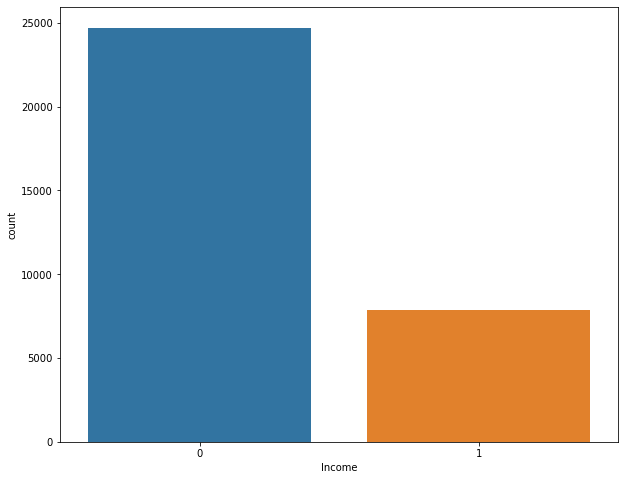

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x="Income",data=census_income)

AS WE CAN CLEALRY SEE THAT MOST PEOPEL IN U.S.A HAVE INCOME LESS THAN 50K DENOTED BY 0 AND ALMOST (I800) PEOPLE IN THE U.S.A HAVE MORE THAN 50K AS COMAPRED TO LESS THAN 50K IT IS VERRY LESS 

<AxesSubplot:xlabel='Sex', ylabel='count'>

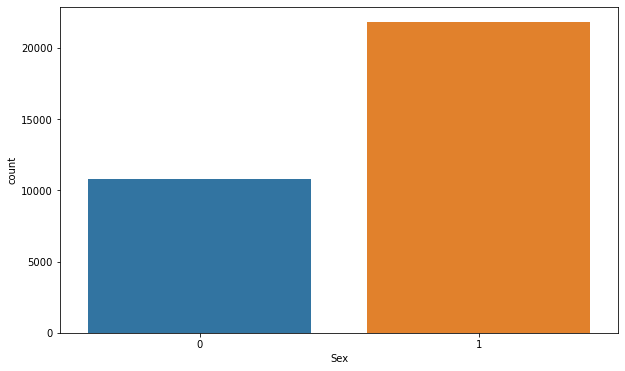

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex",data=census_income)

AS WE CAN CLEALRY SEE THAT THERE ARE MORE NUMBER OF MALE PEOPLE DENOTED (BY 1 ) AND THERE ARE VERY LESS NUMBER OF WOMNES DENOTED (BY 2) ONLY 10000 WOMENS ARE THERE AND MORE THAN 20000 MENS ARE PRSENT IN THE DATSET OF CENSUS INCOME 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

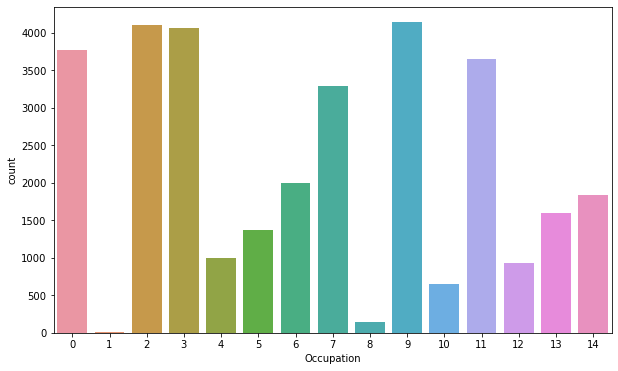

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x="Occupation",data=census_income)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

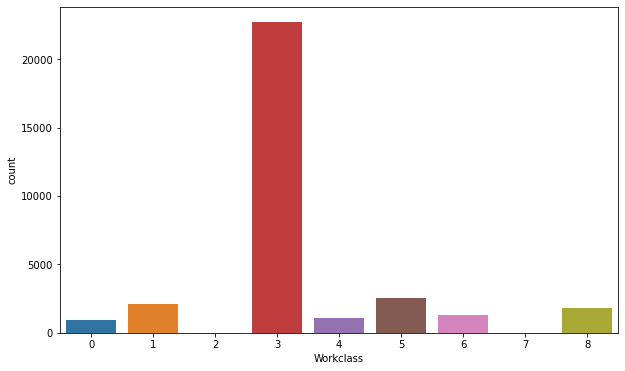

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x="Workclass",data=census_income)

<AxesSubplot:xlabel='Education', ylabel='count'>

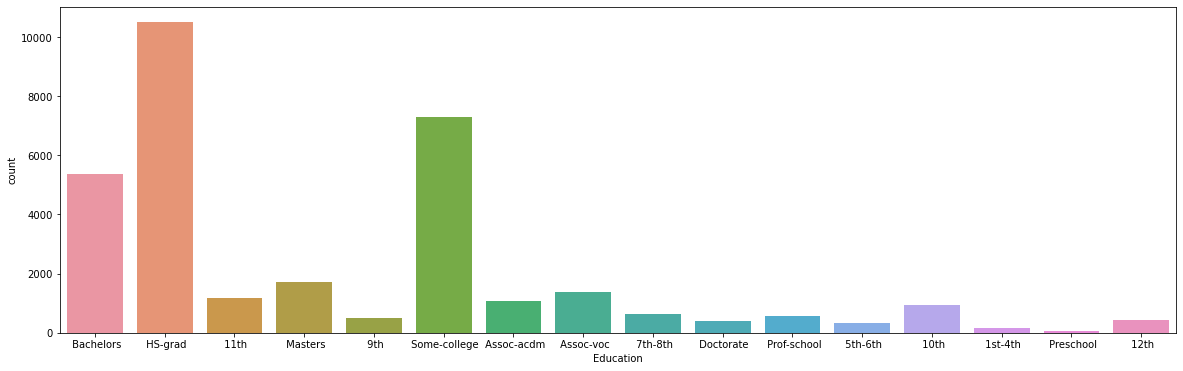

In [42]:
plt.figure(figsize=(20,6))
sns.countplot(x="Education",data=census_income)

<AxesSubplot:xlabel='Race', ylabel='count'>

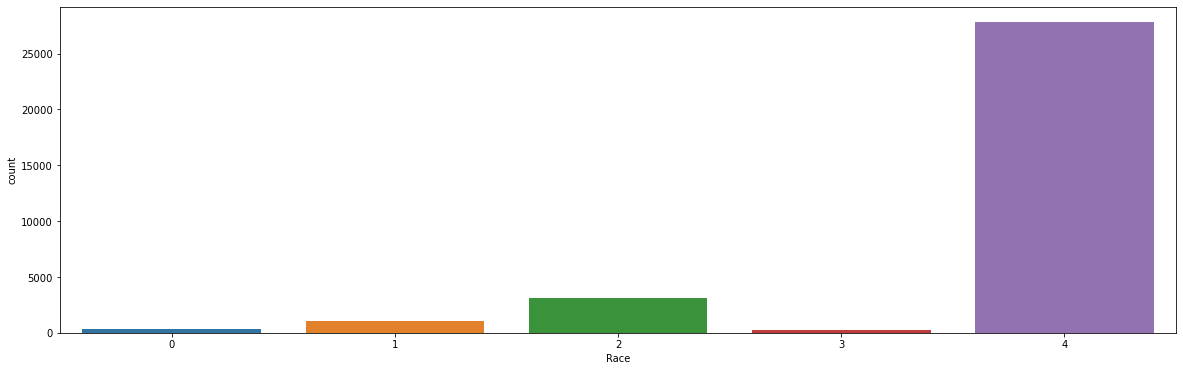

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(x="Race",data=census_income)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

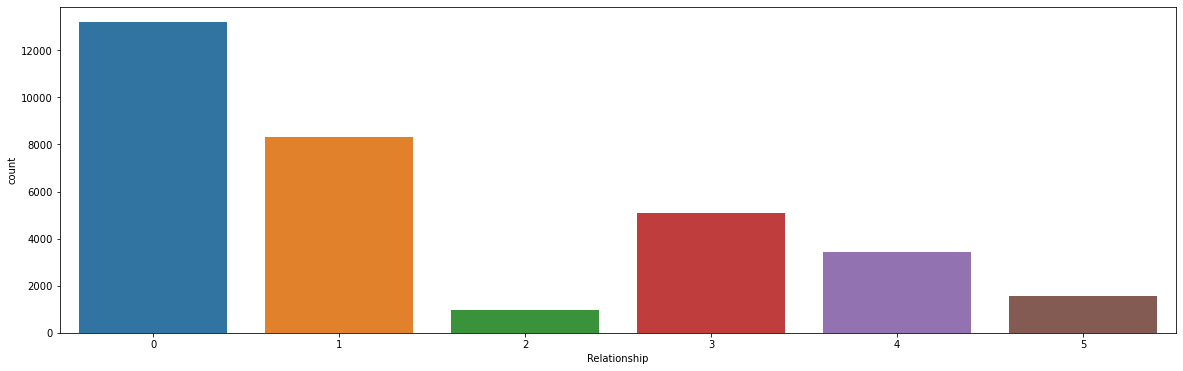

In [44]:
plt.figure(figsize=(20,6))
sns.countplot(x="Relationship",data=census_income)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

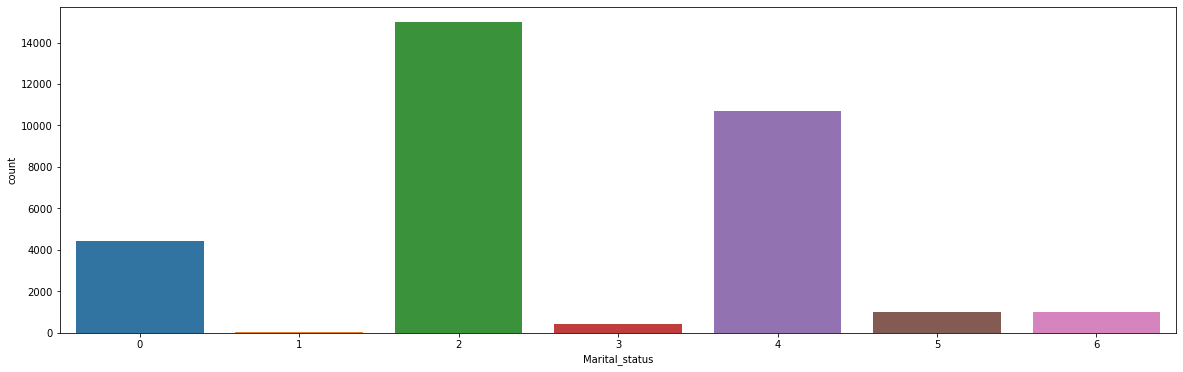

In [45]:
plt.figure(figsize=(20,6))
sns.countplot(x="Marital_status",data=census_income)

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

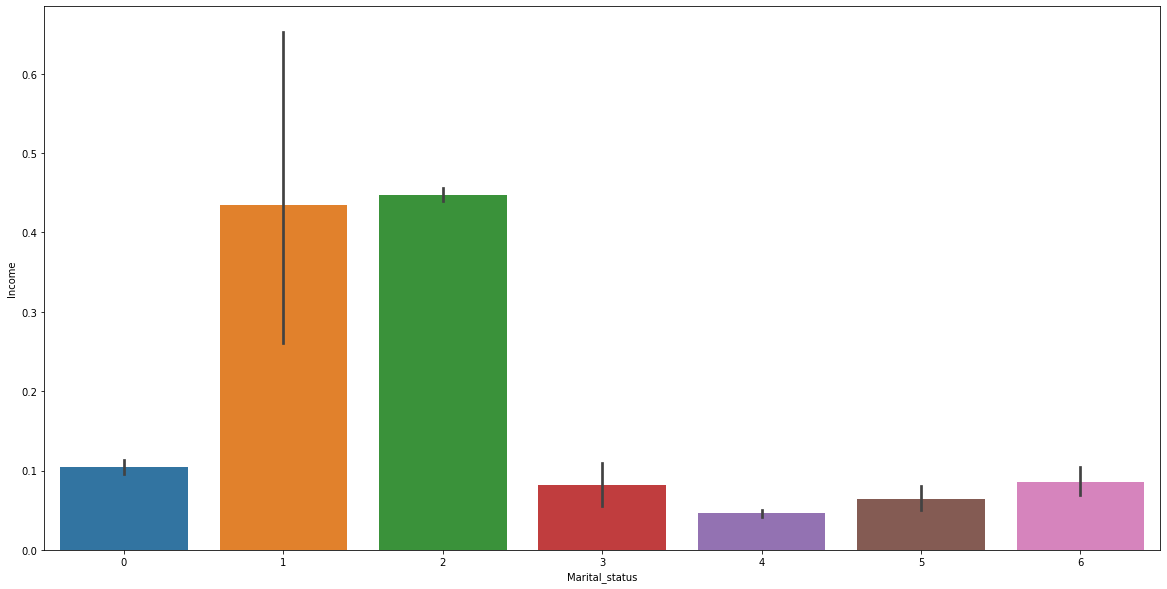

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(x="Marital_status",y="Income",data=census_income)

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

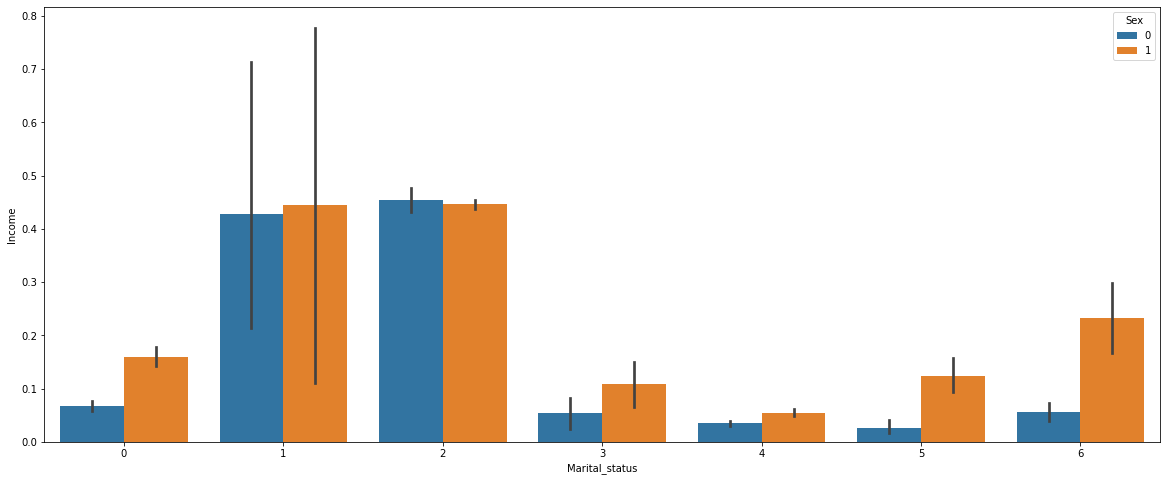

In [47]:
plt.figure(figsize=(20,8))
sns.barplot(x="Marital_status",y="Income",hue="Sex",data=census_income)

<AxesSubplot:xlabel='Education', ylabel='Native_country'>

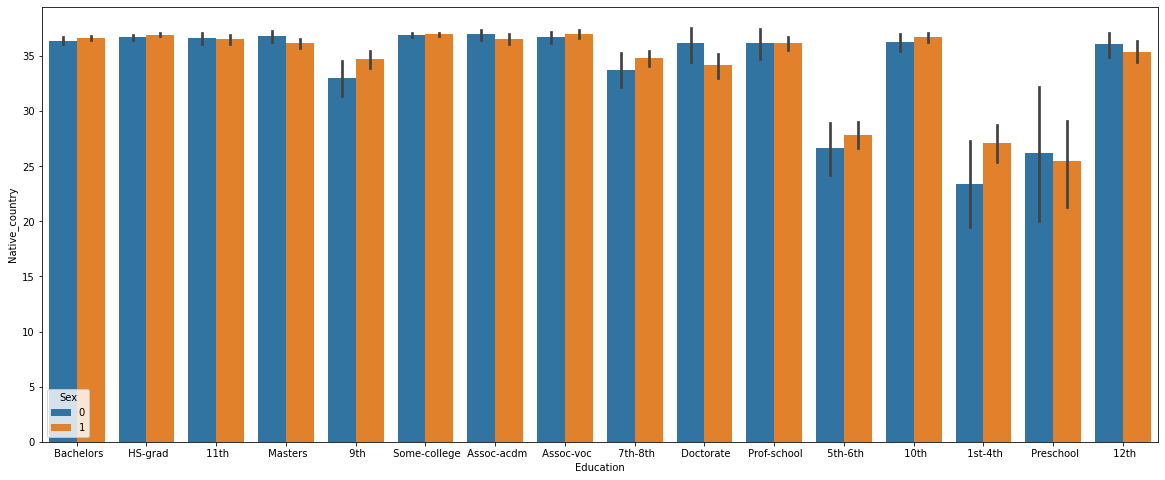

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(y="Native_country",x="Education",hue="Sex",data=census_income)

<Figure size 1440x576 with 0 Axes>

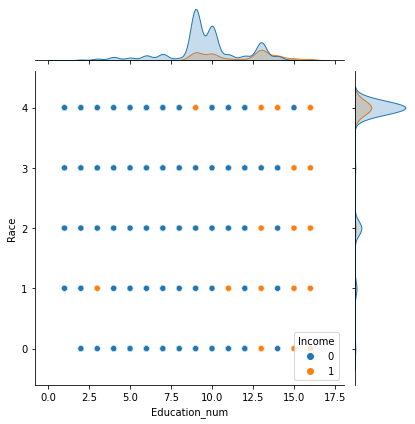

In [49]:
plt.figure(figsize=(20,8))
sns.jointplot(x="Education_num",y="Race",hue="Income",data=census_income)

<AxesSubplot:xlabel='Race', ylabel='Workclass'>

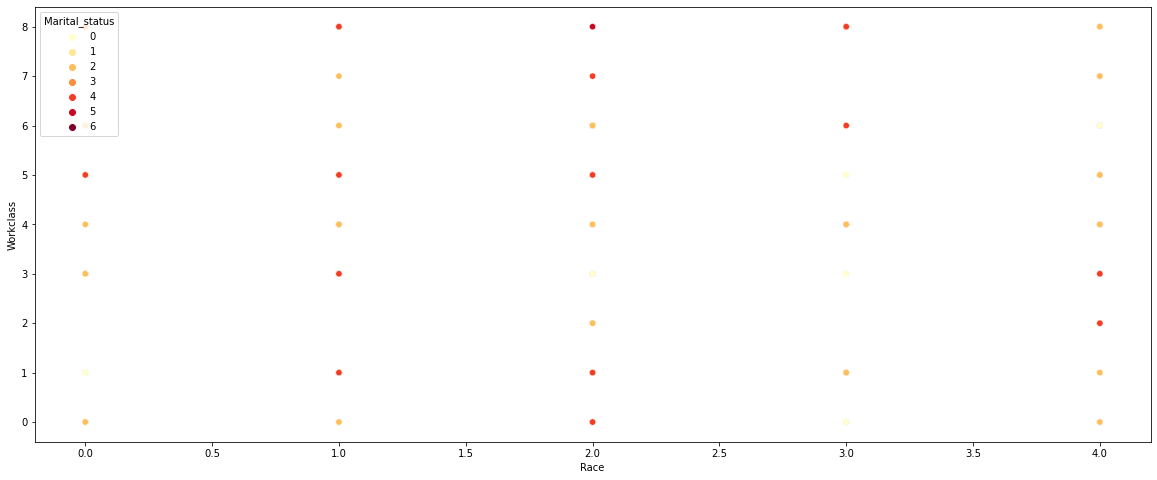

In [54]:
plt.figure(figsize=(20,8))
sns.scatterplot(x="Race",y="Workclass",hue="Marital_status",data=census_income,s=40,palette="YlOrRd")

<AxesSubplot:xlabel='Relationship', ylabel='Marital_status'>

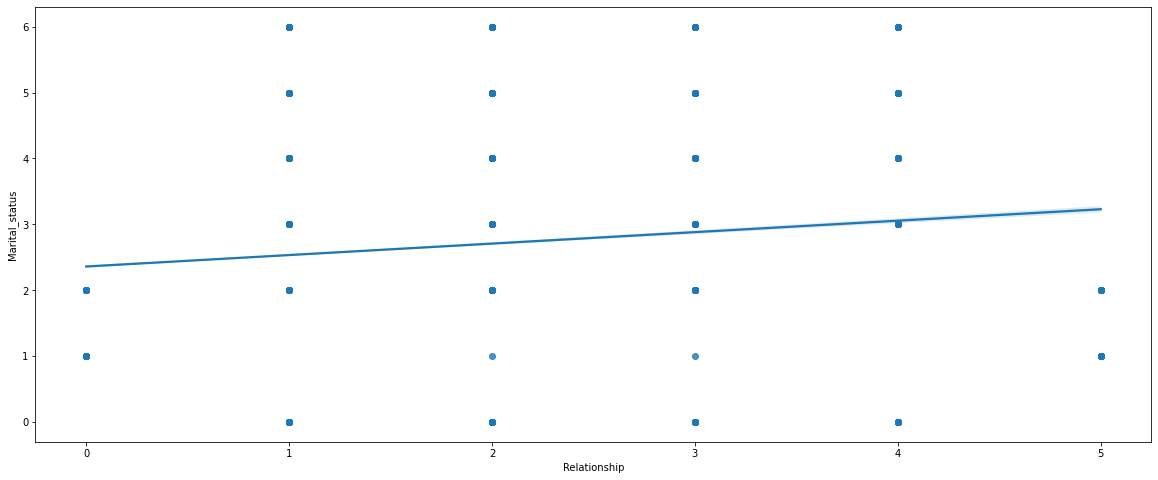

In [57]:
plt.figure(figsize=(20,8))
sns.regplot(x="Relationship",y="Marital_status",data=census_income)

<AxesSubplot:xlabel='Education', ylabel='Occupation'>

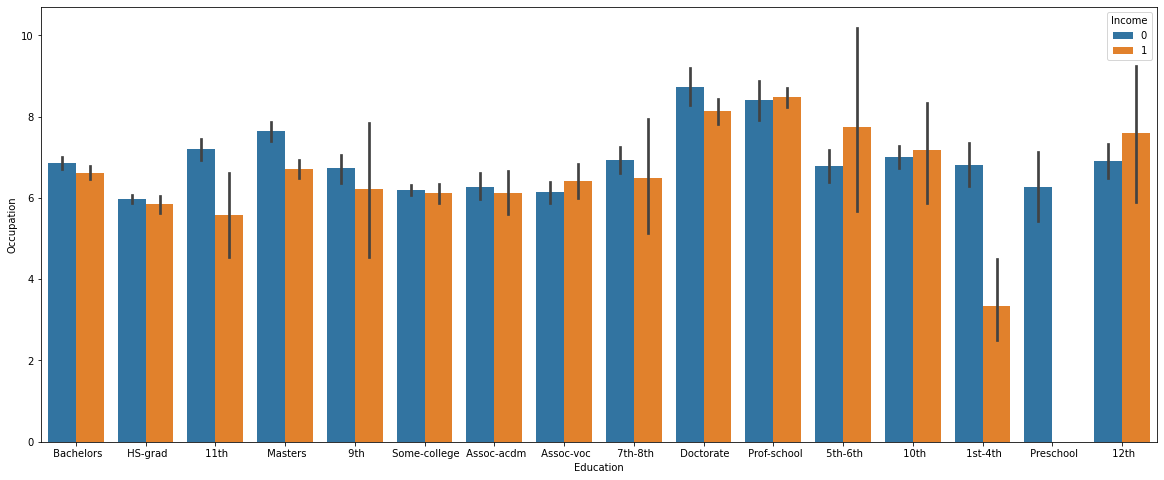

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(y="Occupation",x="Education",hue="Income",data=census_income)

Text(0, 0.5, 'number of people')

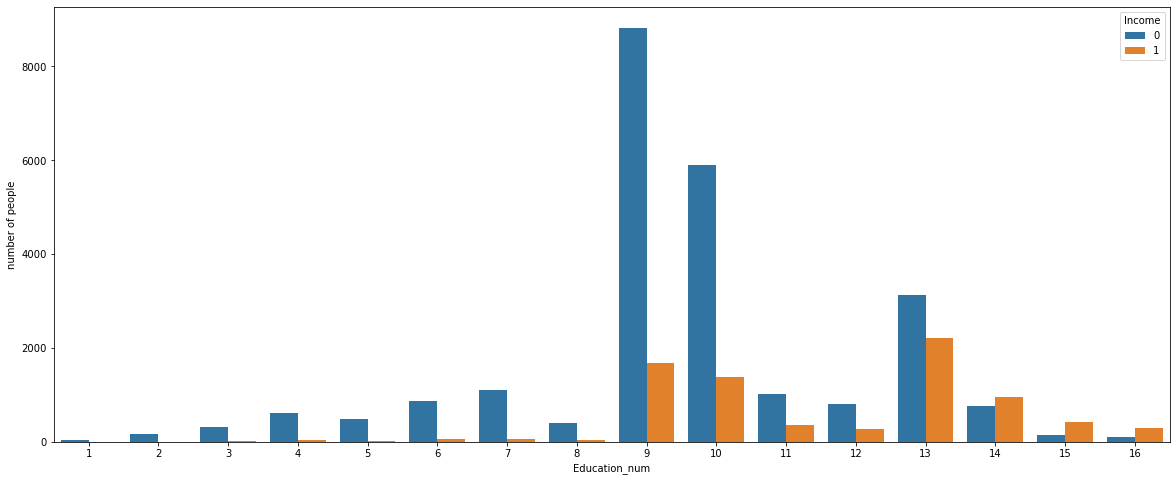

In [64]:
plt.figure(figsize=(20,8))
sns.countplot(x="Education_num",hue="Income",data=census_income)
plt.ylabel("number of people")

<AxesSubplot:xlabel='Race', ylabel='count'>

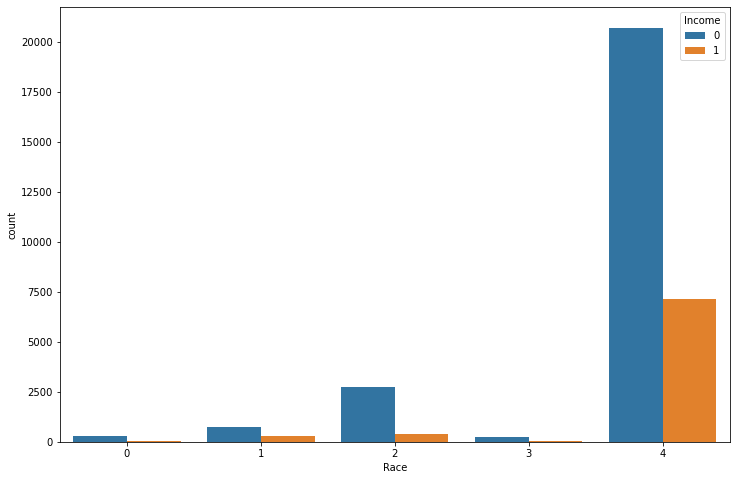

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x="Race",hue="Income",data=census_income)

<Figure size 864x576 with 0 Axes>

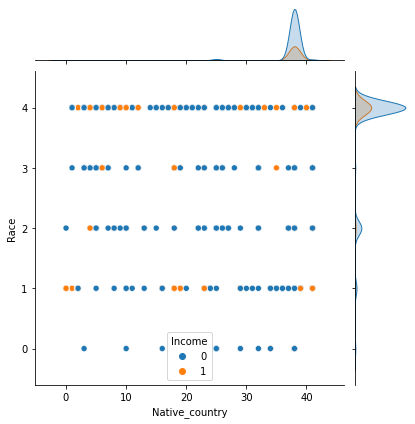

In [68]:
plt.figure(figsize=(12,8))
sns.jointplot(x="Native_country",y="Race",hue="Income",data=census_income)

<AxesSubplot:xlabel='Age', ylabel='count'>

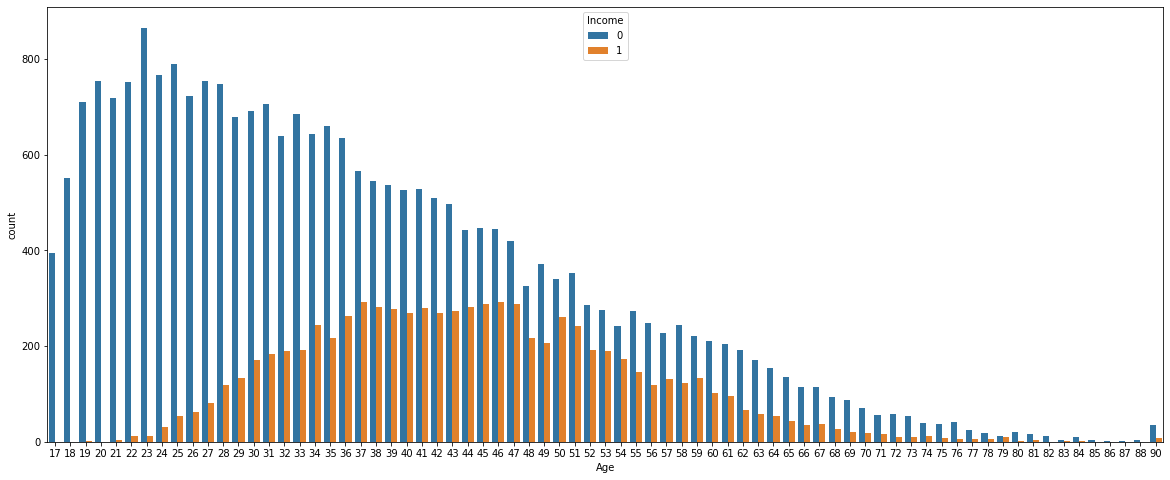

In [71]:
plt.figure(figsize=(20,8))
sns.countplot(x="Age",hue="Income",data=census_income)

In [ ]:
for i in census_income.columns:
    plt.figure(figsize=(20,8))
    
    sns.countplot(x=i,hue="Income",data=census_income)
    


# MULTIVARIATE ANALYSIS 

<Figure size 1440x1080 with 0 Axes>

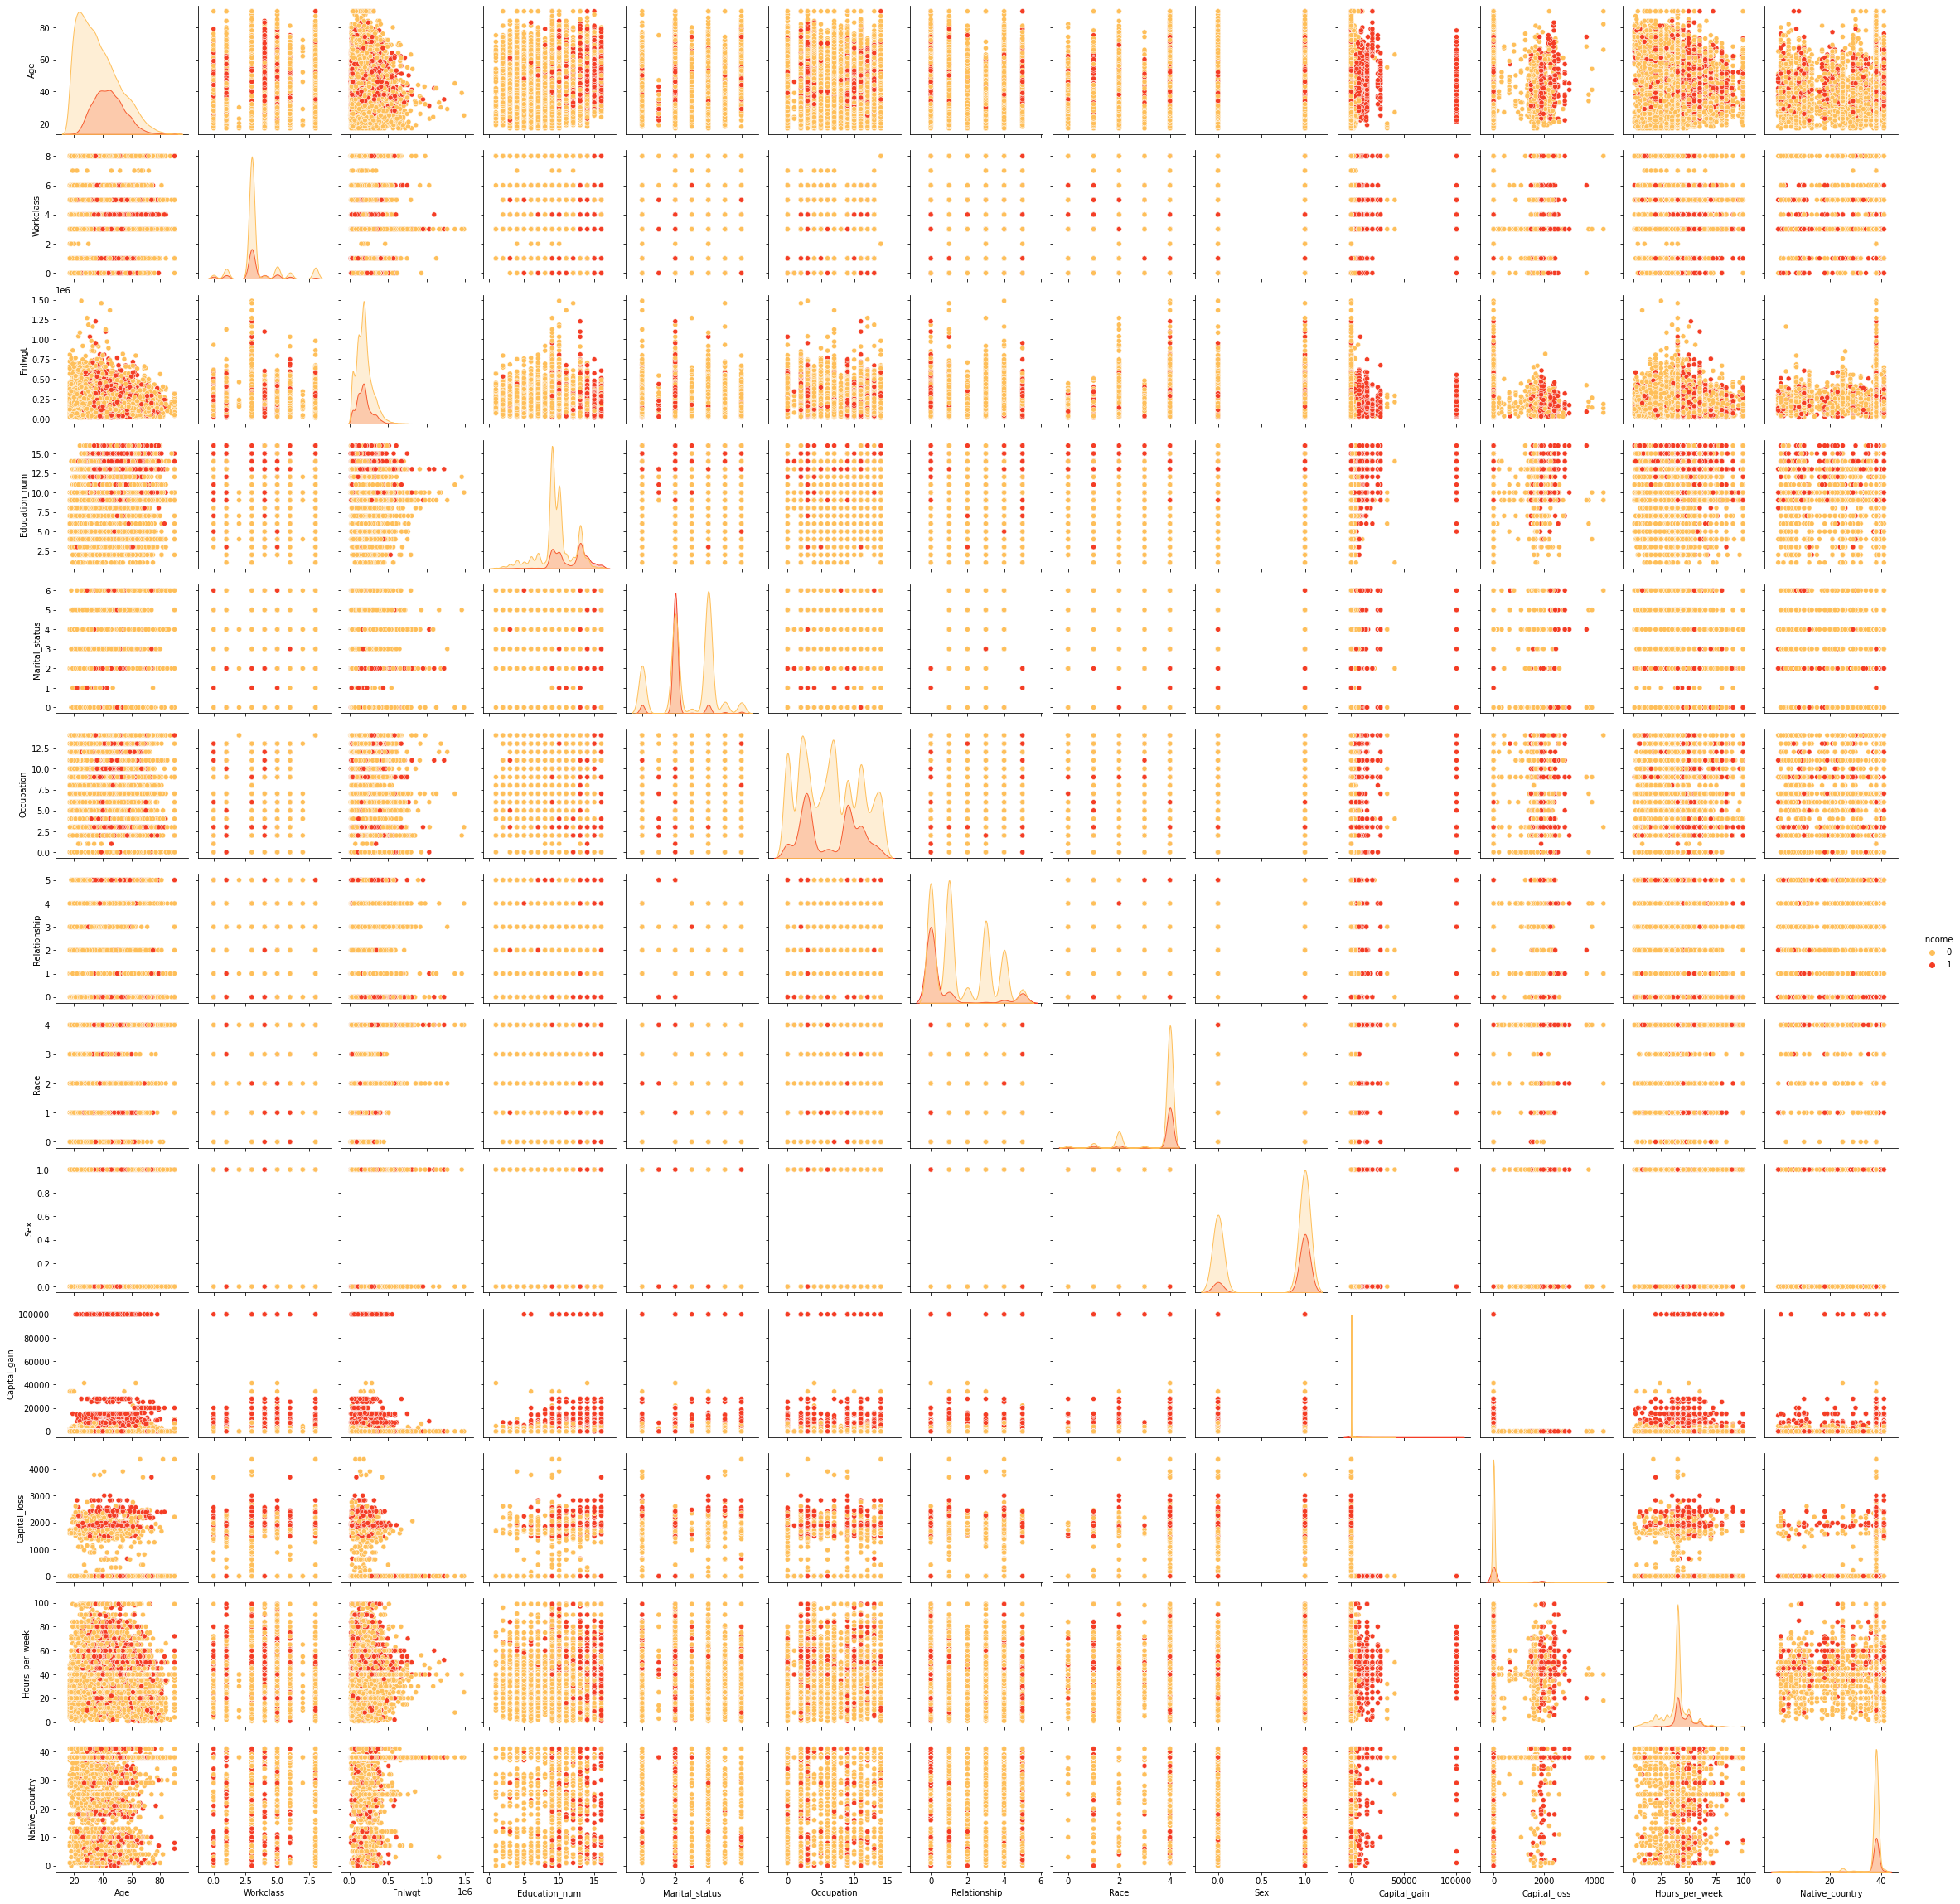

In [72]:
plt.figure(figsize=(20,15))
sns.pairplot(census_income,hue='Income',palette='YlOrRd')
plt.show()

# NOW WE DO SOME PREPROCESSING 

In [38]:
# BEFORE PLOTTING THE OULTIERS WE HAVE TO REMOVE ON CATEGORICAL COLUMN BECVAUSE THIS COLUMN NUMERICAL FEATURES ALREDY GIVEN IN NAME OF EDUCATION_NUM
census_income.drop("Education",axis=1,inplace=True)

In [39]:
census_income

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38,0


# OUTLIERS

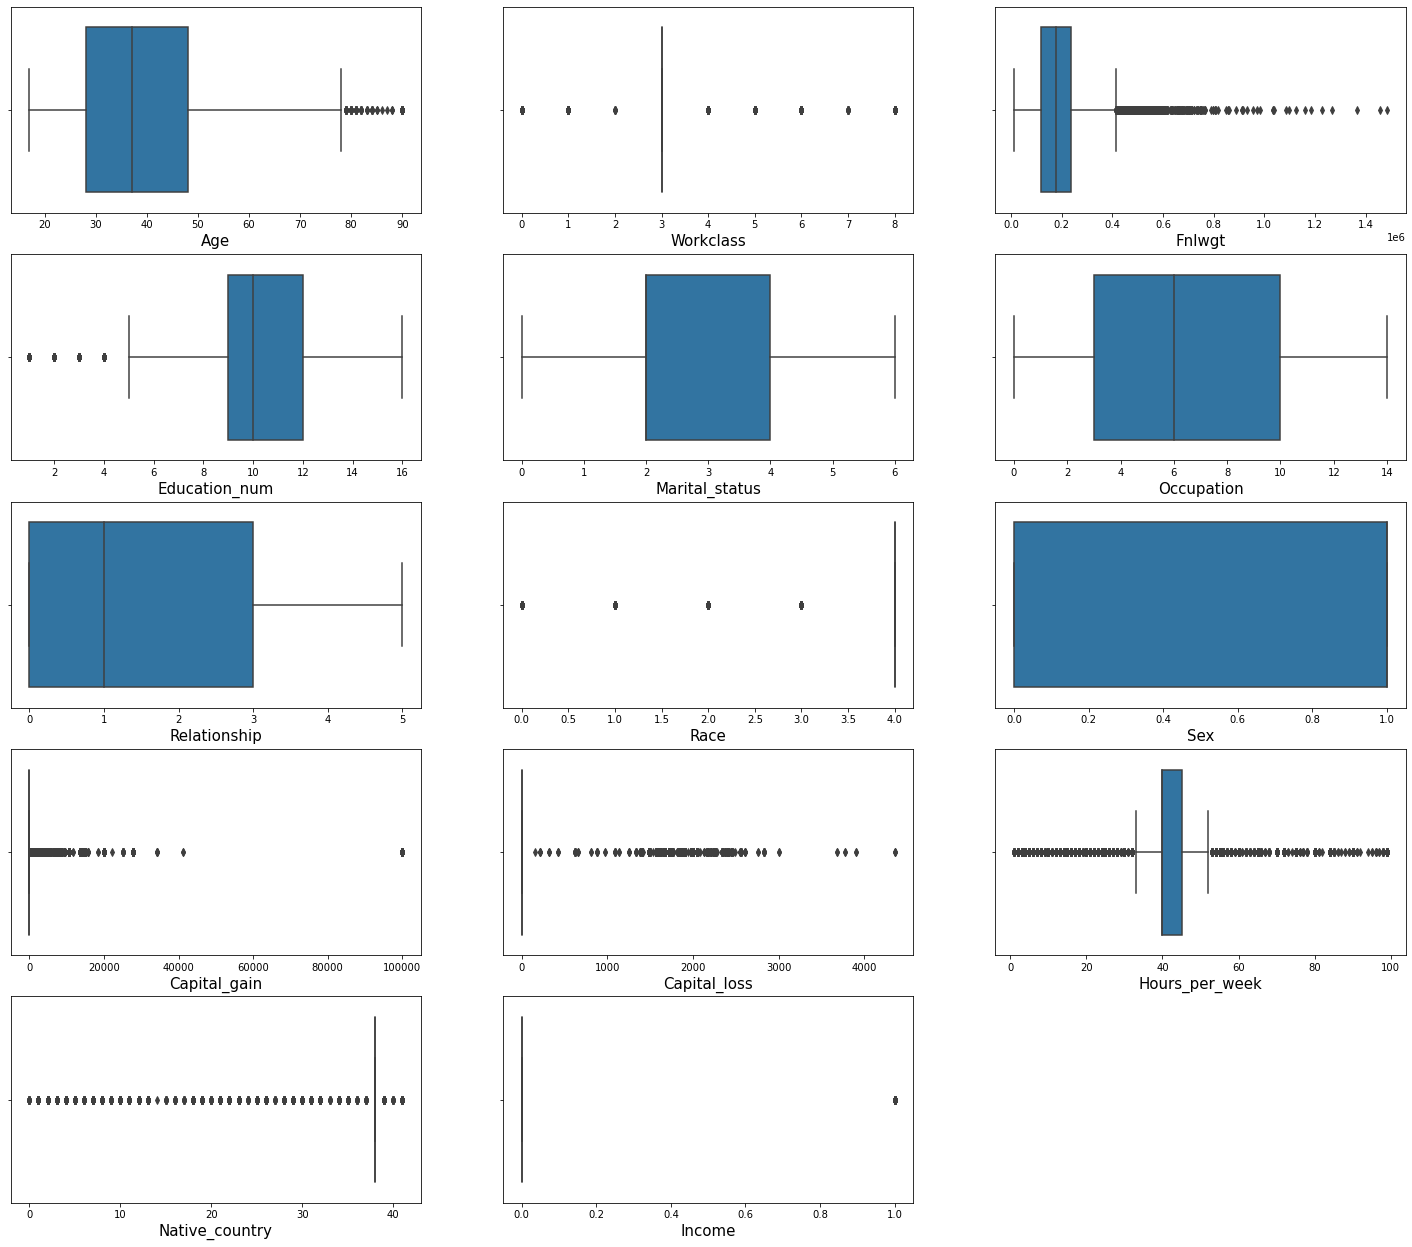

In [40]:
# LET'S FIND OUTLIERS IN THE DATASET 
num_col=[""]
plt.figure(figsize=(25,22))
plotnumber=1
for feature in census_income.columns:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(census_income[feature])
        plt.xlabel(feature,fontsize=15)
    plotnumber+=1
plt.show()


AS WE CAN SEE THAT ONLY YEAR COLUMN HAVE NO OUTLIERS AND REST ONE CONTAIN OUTLIERS SO WE HAVE TO REMOVE THE OUTLIERS SO WILL USE Z- SCORE METHOD

# Z - SCORE

In [41]:
# LET'S USE Z- SCORE METHOD TO REMOVE THE OUTLIERS
feature_with_outliers= census_income[["Age","Workclass","Fnlwgt","Education_num","Race","Capital_gain","Capital_loss","Native_country","Hours_per_week"]]


In [42]:
from scipy.stats import zscore
z=np.abs(zscore(feature_with_outliers))

In [43]:
z

,Age,Workclass,Fnlwgt,Education_num,Race,Capital_gain,Capital_loss,Native_country,Hours_per_week
0,0.837097,1.026384,1.008742,1.134779,0.393675,0.145914,0.216663,0.251382,2.222120
1,0.042640,0.237861,0.245046,0.420027,0.393675,0.145914,0.216663,0.251382,0.035430
2,1.057031,0.237861,0.425770,1.197429,1.962583,0.145914,0.216663,0.251382,0.035430
3,0.775755,0.237861,1.408146,1.134779,1.962583,0.145914,0.216663,5.337886,0.035430
4,0.115952,0.237861,0.898170,1.523480,0.393675,0.145914,0.216663,0.251382,0.035430
...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.237861,0.639710,0.746077,0.393675,0.145914,0.216663,0.251382,0.197407
32556,0.103982,0.237861,0.335466,0.420027,0.393675,0.145914,0.216663,0.251382,0.035430
32557,1.423589,0.237861,0.358811,0.420027,0.393675,0.145914,0.216663,0.251382,0.035430
32558,1.215624,0.237861,0.110927,0.420027,0.393675,0.145914,0.216663,0.251382,1.655200


In [44]:
# We have assumed the Z-score threshold < 3 will have no outliers 

census_income_new=census_income[(z<3).all(axis=1)]

In [45]:
census_income_new

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38,0


AS WE CAN CLEALRY SEE THAT AFTER APPLYING Z-SCORE WE CAN SEE OUR DATSET REMOVED THE OUTLIERS AND NOW OUR DATASET CONTAIN 27783 ROWS COMPARED TO OLD DATSET WERE WE HAVE 32560 ROWS IT MEANS 5000 ROWS WERE REMOVED WERE WE FOUND THE OUTLIERS 

# SKWENESS

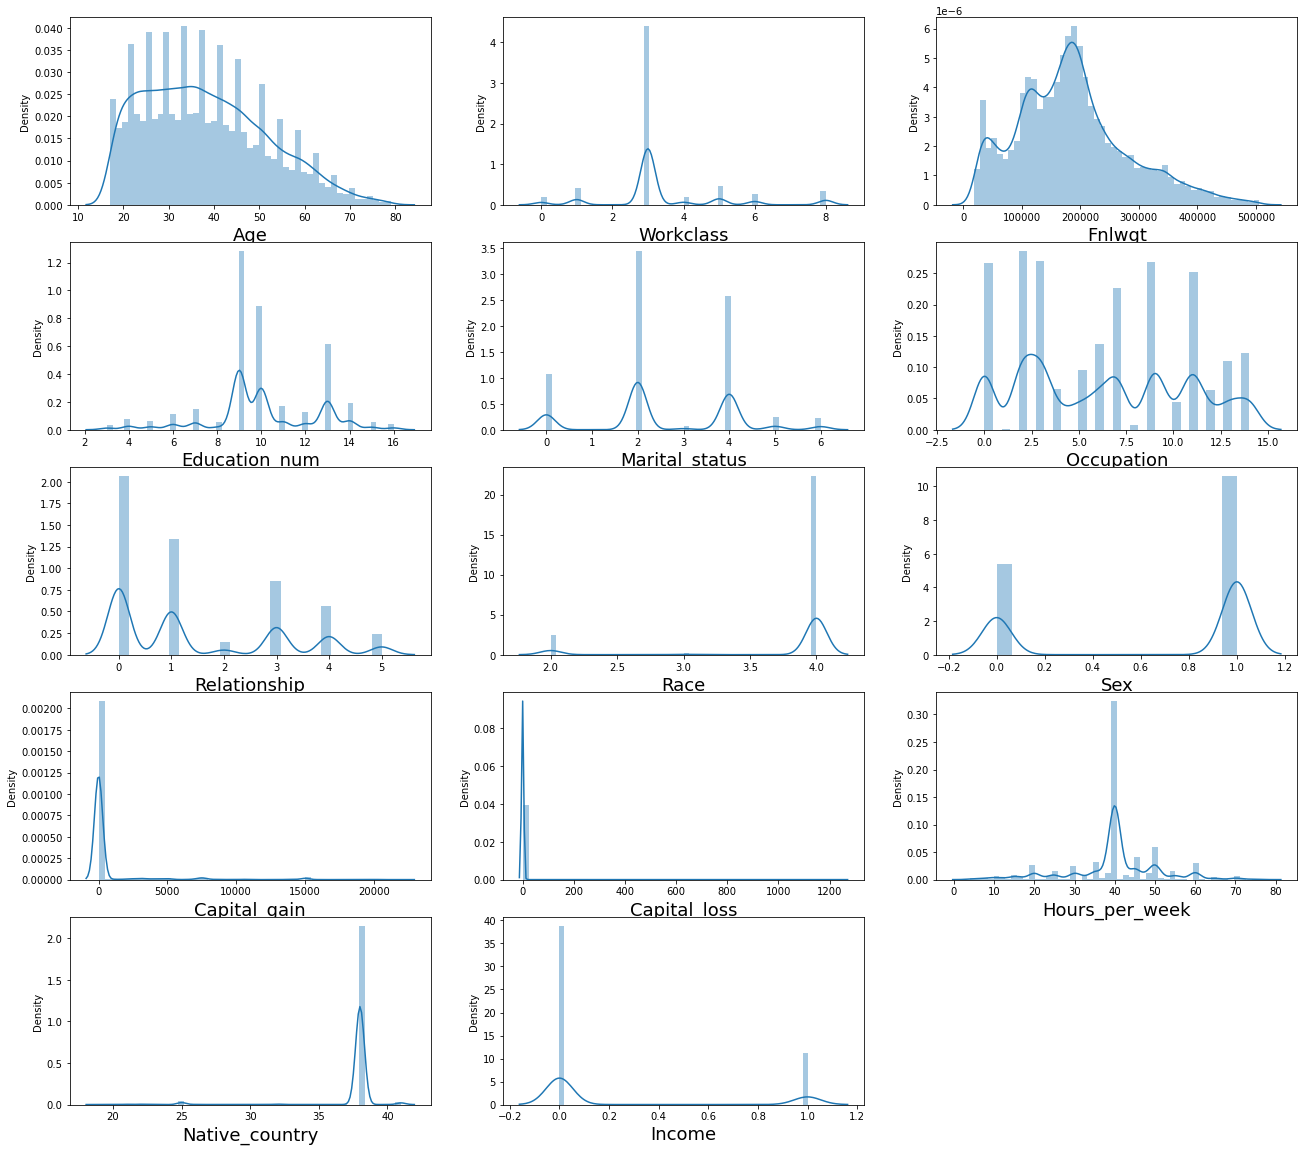

In [46]:
# LET'S CHECK THE SKWENESS OF OUR DATASET USING DISTPLOT
plt.figure(figsize=(22,20))
plotnumber=1
for column in census_income_new.columns:
    if plotnumber<=20:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(census_income_new[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

AS WE CAN SEE LITTILE SKWENESS IS LOOKING OUT FROM THE VISUALIZATION WE CAN SAY THERE LITTLIE SKWENESS BUT WE HAVE TO CONFIRM IT BEWFORE TRAKING DESCION SO WE HAVE TO FIND SKWENESS NUMBER TO CONFIRM 

In [47]:
census_income_new.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      29.521477
Hours_per_week    -0.359723
Native_country    -5.179023
Income             1.323412
dtype: float64

AS WE CAN SEE THAT COLUMN CAPITAL_LOSS HAVE MORE SKWENESS NUMBER ALMOST 29.5 WHICH WE HAVE TO REMOVE FROM OUR DATASET
BY USING POWER TRANSFORM LIS SQRT ( SQUARE ROOT)

In [48]:
from scipy import stats
skewed_columns = ['Capital_loss']
for column in skewed_columns:
    census_income_new[column],_ = stats.boxcox(census_income_new[column] + 1)

In [49]:
census_income_new.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      24.788464
Hours_per_week    -0.359723
Native_country    -5.179023
Income             1.323412
dtype: float64

AS YOU CAN SEE WE HAVE REMOVED THE SKWENESS OF OUR DATASET NOW WE ARE READY TO CHECK MULTICOLLINEARITY OF THE DATASET 

# HEATMAP

In [50]:
corr = census_income_new.corr()
corr

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.042922,-0.077599,0.044412,-0.286278,0.006079,-0.270166,0.020938,0.089335,0.132382,0.021705,0.090928,0.035239,0.241315
Workclass,0.042922,1.000000,-0.017788,-0.060449,0.045782,0.308538,0.013567,0.032434,0.003105,-0.010394,-0.008719,-0.101597,0.005190,-0.060329
Fnlwgt,-0.077599,-0.017788,1.000000,-0.039536,0.029752,-0.001255,0.014884,-0.102281,0.023202,-0.003621,0.000955,-0.018334,-0.103214,-0.011593
Education_num,0.044412,-0.060449,-0.039536,1.000000,-0.058534,0.045515,-0.092873,0.082749,0.003945,0.157588,0.006675,0.155772,0.149067,0.319511
Marital_status,-0.286278,0.045782,0.029752,-0.058534,1.000000,0.054493,0.184104,-0.084671,-0.126149,-0.069569,-0.018081,-0.196905,-0.029891,-0.194068
Occupation,0.006079,0.308538,-0.001255,0.045515,0.054493,1.000000,-0.016552,-0.003834,0.030027,0.002079,-0.001672,-0.064224,0.019637,0.008354
Relationship,-0.270166,0.013567,0.014884,-0.092873,0.184104,-0.016552,1.000000,-0.146470,-0.576884,-0.090011,0.037305,-0.263187,-0.012015,-0.247810
Race,0.020938,0.032434,-0.102281,0.082749,-0.084671,-0.003834,-0.146470,1.000000,0.124862,0.031092,-0.002371,0.057038,0.014516,0.094940
Sex,0.089335,0.003105,0.023202,0.003945,-0.126149,0.030027,-0.576884,0.124862,1.000000,0.069931,-0.033752,0.237000,-0.007392,0.211493
Capital_gain,0.132382,-0.010394,-0.003621,0.157588,-0.069569,0.002079,-0.090011,0.031092,0.069931,1.000000,-0.009869,0.098338,0.018795,0.343081


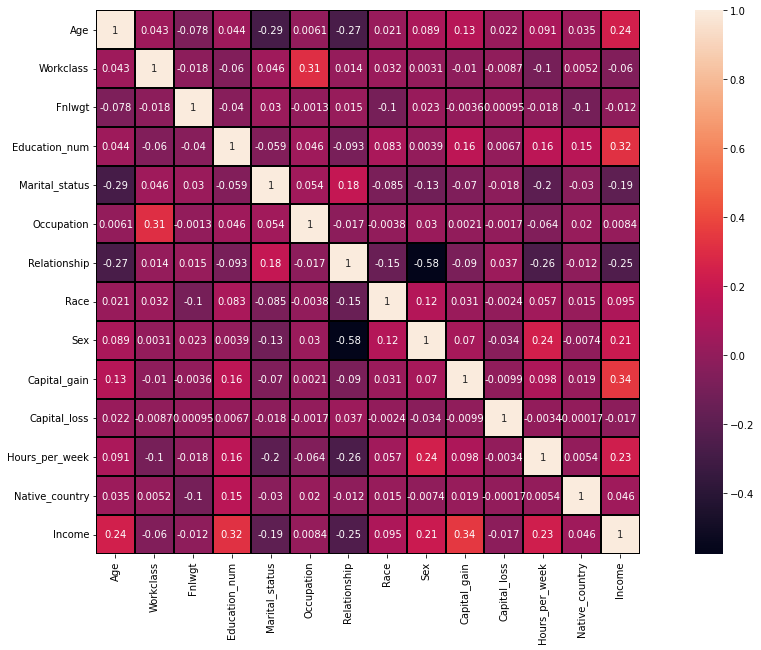

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,annot_kws={'size':10},square=True,linewidth=2,linecolor='black')
plt.show()

AS WE CAN CLEALY SEE THAT AGE. EDUCATION_NUM , CAPITAL _GAIN ARE POSITVELY COORRELATED WITH OUR TARGET VARIABLE AND ALSO HOURS_PER_WEEK BUT WE CAN USE VIF ALSO TO CHECK THE MULTICOLLINEARITY OF THE MODEL SO LT' DO IT 

In [52]:
corr["Income"].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.343081
Education_num     0.319511
Age               0.241315
Hours_per_week    0.232909
Sex               0.211493
Race              0.094940
Native_country    0.046448
Occupation        0.008354
Fnlwgt           -0.011593
Capital_loss     -0.017353
Workclass        -0.060329
Marital_status   -0.194068
Relationship     -0.247810
Name: Income, dtype: float64

In [53]:
# let's visulaize this target variable with other features 
corr_target = corr['Income'].sort_values(ascending=False).drop('Income')
corr_df = pd.DataFrame(corr_target)
corr_df.reset_index(inplace=True)

In [54]:
corr_df

,index,Income
0,Capital_gain,0.343081
1,Education_num,0.319511
2,Age,0.241315
3,Hours_per_week,0.232909
4,Sex,0.211493
5,Race,0.094940
6,Native_country,0.046448
7,Occupation,0.008354
8,Fnlwgt,-0.011593
9,Capital_loss,-0.017353


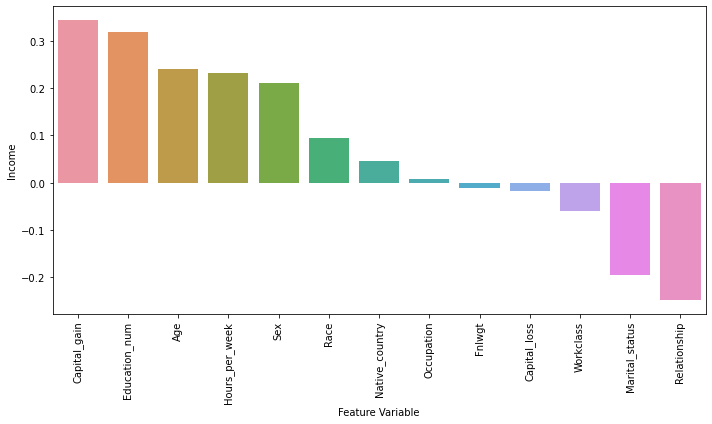

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Income', data=corr_df)
plt.xlabel('Feature Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

AS YOU CAN CLEALRY SEE THAT REGION IS THE LEAST COORELATED WITH TARGET VARIABLE AND TOTTAL HIGHLY NEGATIVE COORELATDED WITH TARGET VARIABLE AND TYPE AND YEAR IS POSITIVELY COORELATED WITH OUR TARGET VARIABLE

# NOW WE BUILD OUR REGRESSION MODEL USING AVERAGE PRICE AS TARGET VARIABLE

In [56]:
# LET'S SEPRATE THE TAGET AND FEATURE VARIABLE FROM THE DATASET 
x= census_income_new.drop("Income",axis=1)
y= census_income_new["Income"]

In [57]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,13,2,3,0,4,1,0,0.0,13,38
1,38,3,215646,9,0,5,1,4,1,0,0.0,40,38
2,53,3,234721,7,2,5,0,2,1,0,0.0,40,38
4,37,3,284582,14,2,3,5,4,0,0,0.0,40,38
5,49,3,160187,5,3,7,1,2,0,0,0.0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0.0,38,38
32556,40,3,154374,9,2,6,0,4,1,0,0.0,40,38
32557,58,3,151910,9,6,0,4,4,0,0,0.0,40,38
32558,22,3,201490,9,4,0,3,4,1,0,0.0,20,38


In [58]:
x.shape

(27783, 13)

In [59]:
y.shape

(27783,)

# Let's use standard scaler to standarized the data

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [61]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.883813,1.040837,-1.087717,1.212761,-0.405005,-0.777953,-0.914303,0.344839,0.713243,-0.245010,-0.040278,-2.414561,0.166220
1,-0.011717,-0.230600,0.310402,-0.440452,-1.721984,-0.317682,-0.291581,0.344839,0.713243,-0.245010,-0.040278,0.006746,0.166220
2,1.107695,-0.230600,0.511930,-1.267059,-0.405005,-0.317682,-0.914303,-2.958268,0.713243,-0.245010,-0.040278,0.006746,0.166220
3,-0.086344,-0.230600,1.038712,1.626065,-0.405005,-0.777953,2.199308,0.344839,-1.402047,-0.245010,-0.040278,0.006746,0.166220
4,0.809185,-0.230600,-0.275522,-2.093666,0.253484,0.142589,-0.291581,-2.958268,-1.402047,-0.245010,-0.040278,-2.145527,-6.296032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27778,-0.832619,-0.230600,0.750498,0.799458,-0.405005,1.293266,2.199308,0.344839,-1.402047,-0.245010,-0.040278,-0.172610,0.166220
27779,0.137538,-0.230600,-0.336936,-0.440452,-0.405005,-0.087546,-0.914303,0.344839,0.713243,-0.245010,-0.040278,0.006746,0.166220
27780,1.480833,-0.230600,-0.362969,-0.440452,2.228952,-1.468359,1.576586,0.344839,-1.402047,-0.245010,-0.040278,0.006746,0.166220
27781,-1.205756,-0.230600,0.160844,-0.440452,0.911973,-1.468359,0.953864,0.344839,0.713243,-0.245010,-0.040278,-1.786815,0.166220


As you can see that we have sdtandarized our dataset it measn we have given equal weightatge to the the all datapoints


# LET'S CHECK MULTICOLLINEARITY USING VIF 

In [62]:
#  LET'S CHECK THE MULTICOLLINEARITY VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["VIF_value"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_data["feature"]=x.columns

In [63]:
vif_data

,VIF_value,feature
0,1.187693,Age
1,1.125635,Workclass
2,1.029256,Fnlwgt
3,1.093431,Education_num
4,1.142606,Marital_status
5,1.117396,Occupation
6,1.678135,Relationship
7,1.047572,Race
8,1.549420,Sex
9,1.049577,Capital_gain


AS WE THAT THERE ARE IS NO MULITCOLLINEARITY PRESENT IN THE DATASET AND OUR DATSET IS CLEAN FOR FURTHER MAKING OF THE MODEL 

# LET'S BALANCED OUR DATASET OF TARGET VARIALE 

In [64]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [65]:
y.value_counts()

0    21557
1    21557
Name: Income, dtype: int64

AS WE CAN SEE THAT OUR DATASET IS BALANCED PERFECT FOR BUILDING THE MODEL 

# LET'S BUILD CLASSIFICATION MODEL 

# MODEL

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Random Forest classifier

In [67]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        RFR = RandomForestClassifier()
        
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 65
 best_accuracy_score:-  91.17476516293634


In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)
RFR=RandomForestClassifier()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of random forest classifier is ")
print(conf)
print("classification_report of random forest classifier at random state is:- ")
print(clas)

confusion matrix of random forest classifier is 
[[3920  431]
 [ 341 3931]]
classification_report of random forest classifier at random state is:- 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4351
           1       0.90      0.92      0.91      4272

    accuracy                           0.91      8623
   macro avg       0.91      0.91      0.91      8623
weighted avg       0.91      0.91      0.91      8623



# Logistic regression

In [69]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        logistic_r= LogisticRegression()
        
        logistic_r.fit(X_train, y_train)
        y_pred = logistic_r.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 37
 best_accuracy_score:-  78.03548648962078


In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
logistic_r= LogisticRegression()
logistic_r.fit(X_train, y_train)
y_pred = logistic_r.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of logistic regression is ")
print(conf)
print("classification_report of logistic regression is:- ")
print(clas)

confusion matrix of logistic regression is 
[[3363  934]
 [ 960 3366]]
classification_report of logistic regression is:- 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4297
           1       0.78      0.78      0.78      4326

    accuracy                           0.78      8623
   macro avg       0.78      0.78      0.78      8623
weighted avg       0.78      0.78      0.78      8623



# Descion Tree Classifier

In [71]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        dtc=DecisionTreeClassifier()
        
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 8
 best_accuracy_score:-  87.05786849124435


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is DecisionTreeClassifier")
print(conf)
print("classification_report of DecisionTreeClassifier is:- ")
print(clas)

confusion matrix of  is DecisionTreeClassifier
[[3701  637]
 [ 486 3799]]
classification_report of DecisionTreeClassifier is:- 
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4338
           1       0.86      0.89      0.87      4285

    accuracy                           0.87      8623
   macro avg       0.87      0.87      0.87      8623
weighted avg       0.87      0.87      0.87      8623



# Ada Boost Classifier

In [74]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        adb=AdaBoostClassifier()
        
        adb.fit(X_train, y_train)
        y_pred = adb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 183
 best_accuracy_score:-  86.44323321349879


In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=183)
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is AdaBoostClassifier")
print(conf)
print("classification_report of AdaBoostClassifier is:- ")
print(clas)

confusion matrix of  is AdaBoostClassifier
[[3688  690]
 [ 479 3766]]
classification_report of AdaBoostClassifier is:- 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4378
           1       0.85      0.89      0.87      4245

    accuracy                           0.86      8623
   macro avg       0.87      0.86      0.86      8623
weighted avg       0.87      0.86      0.86      8623



# Gradient Boosting classifier

In [76]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        GBC=GradientBoostingClassifier()
        
        GBC.fit(X_train, y_train)
        y_pred = GBC.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 183
 best_accuracy_score:-  87.52174417256175


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=183)
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is Gradient Booting classfier")
print(conf)
print("classification_report of Gradient boosting Classifier is:- ")
print(clas)

confusion matrix of  is Gradient Booting classfier
[[3729  649]
 [ 427 3818]]
classification_report of Gradient boosting Classifier is:- 
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4378
           1       0.85      0.90      0.88      4245

    accuracy                           0.88      8623
   macro avg       0.88      0.88      0.88      8623
weighted avg       0.88      0.88      0.88      8623



# KNeighborsClassifier

In [78]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        knn = KNN()
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 46
 best_accuracy_score:-  87.1738374115737


In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)
knn=KNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is kneighbours classfier")
print(conf)
print("classification_report of Kneighbours  Classifier is:- ")
print(clas)

confusion matrix of  is kneighbours classfier
[[3313  876]
 [ 230 4204]]
classification_report of Kneighbours  Classifier is:- 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4189
           1       0.83      0.95      0.88      4434

    accuracy                           0.87      8623
   macro avg       0.88      0.87      0.87      8623
weighted avg       0.88      0.87      0.87      8623



# EXTRA TREE CLASSIFIER

In [83]:
def select_best_random_state(x, y):
    best_random_state =0
    best_accuracy_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesClassifier()
        
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy_score:
            best_accuracy_score = acc
            best_random_state = random_state

    return best_random_state, best_accuracy_score 


best_random_state, best_accuracy_score= select_best_random_state(x, y)
print("Best Random State  :", best_random_state)
print(" best_accuracy_score:- ", best_accuracy_score*100)

Best Random State  : 65
 best_accuracy_score:-  91.85898179287952


In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)
ETR = ExtraTreesClassifier()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
clas=classification_report(y_test,y_pred)
print("confusion matrix of  is kneighbours classfier")
print(conf)
print("classification_report of Kneighbours  Classifier is:- ")
print(clas)

confusion matrix of  is kneighbours classfier
[[3912  439]
 [ 270 4002]]
classification_report of Kneighbours  Classifier is:- 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4351
           1       0.90      0.94      0.92      4272

    accuracy                           0.92      8623
   macro avg       0.92      0.92      0.92      8623
weighted avg       0.92      0.92      0.92      8623



# Now we will do croos validation to check which model is best suitable to use for this dataset

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
score=cross_val_score(RFR,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

90.20742888134002
[0.82894584 0.88832193 0.92554795 0.93459353 0.93296219]
0.01651552911539489


In [87]:
score=cross_val_score(logistic_r,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

76.61548431765821
[0.76040821 0.76794619 0.76411922 0.77223704 0.76606356]
0.15243497475221301


In [88]:
score=cross_val_score(dtc,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

85.77731847521557
[0.76852604 0.84947234 0.88936565 0.89064131 0.89086059]
0.060816633176639434


In [89]:
score=cross_val_score(adb,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

85.20205506288268
[0.81607329 0.84692103 0.86257683 0.86849124 0.86604036]
0.06656926729996837


In [90]:
score=cross_val_score(GBC,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

86.37337828117599
[0.8164212  0.85724226 0.87846457 0.88449496 0.88204593]
0.054856035117035296


In [91]:
score=cross_val_score(knn,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

86.33624509206805
[0.84854459 0.85643048 0.86767946 0.87208628 0.87207145]
0.05522736700811459


In [92]:
score=cross_val_score(ETR,x,y)
print((score.mean())*100)
print(score)
print((best_accuracy_score)-score.mean())

91.13981362064789
[0.86872318 0.9003827  0.92624377 0.93099849 0.93064254]
0.007191681722316323


# From the above we can clealry see that least difference between for EXTRA TREE CLASSIOFIER SO WE WILL SELCT EXTRA TREE CLASSIFIER FOR FUTHER HYPERPARAMETER TUNNING

# HYPERPARAMETER TUNNING

In [93]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'max_features':['sqrt','log2'],
              'max_depth' : [0, 10, 20,30,40],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [100, 200, 300]}

In [94]:
GSCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [95]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1]})

In [96]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 100,
 'n_jobs': -2}

# now we get our final best_parameters now we use to build our final mode

In [110]:
census_income_model = ExtraTreesClassifier(criterion='gini', max_depth=40, max_features='log2', n_estimators=200, n_jobs=-2)
census_income_model.fit(X_train, y_train)
pred = census_income_model.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.89377246897831


# As you can see our final model accuracy is :- 92 %

In [111]:
conf_final_model_census_income=confusion_matrix(y_test,pred)
print("confusion matrix of our final model insurance is")
print(conf_final_model_census_income)
clas_final_model_census_income=classification_report(y_test,pred)
print("Classsification report of our final model insurance is ")
print(clas_final_model_census_income)

confusion matrix of our final model insurance is
[[3885  466]
 [ 233 4039]]
Classsification report of our final model insurance is 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4351
           1       0.90      0.95      0.92      4272

    accuracy                           0.92      8623
   macro avg       0.92      0.92      0.92      8623
weighted avg       0.92      0.92      0.92      8623



In [113]:
import pickle
project_name="census_income.pkl"
pickle.dump(census_income_model,open(project_name,'wb'))

In [114]:
import pickle
load_final_model=pickle.load(open('census_income.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

91.89377246897831


# Plotting ROC and Compare AUC for the best mode

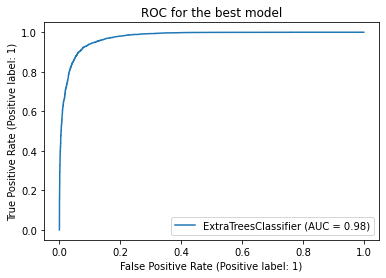

In [115]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(census_income_model, X_test, y_test)
plt.title("ROC for the best model")
plt.show()

# AS WE CAN SEE THR ROC_CURVE SHOW THAT MODEL ALMOST 99 CORRECT

In [116]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [117]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622
predicted,0,1,1,0,1,0,1,1,1,1,...,0,1,1,0,0,1,0,1,0,0
original,0,1,1,0,1,1,1,1,1,1,...,0,0,1,0,0,1,0,1,0,0


# AS YOU CAN SEE THE FEW DATA POINTS OUR MODEL PREDICTION AND ORIGINAL VALUES ARE COMING SAME IT MEANS WHAT WE ARE PREDICTING WE GETTING IT COORECT 92 % WHICH IS PERFECT